### Description of data

Download data only for relevant columns so that the data volume is manageable. These are the recommended fields: 
- created_date,
- unique_key,
- complaint_type, 
- incident_zip,
- incident_address,
- street_name,
- address_type,
- city,
- resolution_description, 
- borough,
- latitude,
- longitude,
- closed_date,
- location_type, 
- status

- Created Date = Date SR was created 
- Unique Key = Unique identifier of a Service Request (SR) in the open data set 
- Complaint Type = This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.
- Incident Zip = Incident location zip code, provided by geo validation. 
- Incident Address = House number of incident address provided by submitter. 
- Street Name	= Street name of incident address provided by the submitter 
- Address Type = Type of incident location information available. 
- City = City of the incident location provided by geovalidation. 
- Resolution Description = Describes the last action taken on the SR by the responding agency. May describe next or future steps. 
- Borough	= Provided by the submitter and confirmed by geovalidation. 
- Latitude = Geo based Lat of the incident location
- Longitude = Geo based Long of the incident location 
- Closed Date	= Date SR was closed by responding agency 
- Location Type = Describes the type of location used in the address information
- Status = Status of SR submitted 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [2]:
df = pd.read_csv("nycdata.csv", parse_dates=True, infer_datetime_format=True, low_memory=False)

In [3]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,45539970,2020-02-03T11:34:00.000,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11694.0,180 BEACH 117 STREET,BEACH 117 STREET,NaN,NaN,NaN,NaN,ADDRESS,Rockaway Park,NaN,NaN,Open,NaN,The following complaint conditions are still o...,2020-02-03T00:00:00.000,14 QUEENS,4.162260e+09,QUEENS,1029314.0,150248.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.578958,-73.837773,"\n, \n(40.57895755424285, -73.83777329170152)"
1,45540031,2020-02-03T15:42:43.000,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,10035.0,1900 LEXINGTON AVENUE,LEXINGTON AVENUE,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Open,NaN,The following complaint conditions are still o...,2020-02-03T00:00:00.000,11 MANHATTAN,1.017670e+09,MANHATTAN,1000700.0,230764.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.800055,-73.940585,"\n, \n(40.80005453928576, -73.94058468907889)"
2,45539181,2020-02-03T12:53:54.000,NaN,HPD,Department of Housing Preservation and Develop...,ELECTRIC,LIGHTING,RESIDENTIAL BUILDING,10466.0,4040 CARPENTER AVENUE,CARPENTER AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,NaN,The following complaint conditions are still o...,2020-02-03T00:00:00.000,12 BRONX,2.048300e+09,BRONX,1022327.0,263780.0,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.890607,-73.862283,"\n, \n(40.89060691355313, -73.86228332460803)"
3,45538988,2020-02-03T05:53:31.000,2020-02-03T16:54:52.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10461.0,1185 NEILL AVENUE,NEILL AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,2020-02-03T16:54:52.000,11 BRONX,2.043090e+09,BRONX,1025056.0,250840.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.855078,-73.852492,"\n, \n(40.85507843915571, -73.85249192141404)"
4,45540022,2020-02-03T18:01:48.000,NaN,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10468.0,2523 UNIVERSITY AVENUE,UNIVERSITY AVENUE,NaN,NaN,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Open,NaN,The following complaint conditions are still o...,2020-02-03T00:00:00.000,07 BRONX,2.032200e+09,BRONX,1011155.0,254849.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866135,-73.902726,"\n, \n(40.86613523613008, -73.90272597995825)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
unique_key                        100000 non-null int64
created_date                      100000 non-null object
closed_date                       91976 non-null object
agency                            100000 non-null object
agency_name                       100000 non-null object
complaint_type                    100000 non-null object
descriptor                        100000 non-null object
location_type                     100000 non-null object
incident_zip                      99957 non-null float64
incident_address                  100000 non-null object
street_name                       100000 non-null object
cross_street_1                    11 non-null object
cross_street_2                    11 non-null object
intersection_street_1             0 non-null float64
intersection_street_2             0 non-null float64
address_type                      100000 non-null obj

### Remove missing values (columns) that has majority ones

In [5]:
df2 = df[['unique_key','created_date','closed_date','complaint_type','location_type','incident_zip','incident_address','street_name',
         'address_type','city','status','resolution_description','borough','latitude','longitude']]

In [6]:
df2.head()

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
0,45539970,2020-02-03T11:34:00.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11694.0,180 BEACH 117 STREET,BEACH 117 STREET,ADDRESS,Rockaway Park,Open,The following complaint conditions are still o...,QUEENS,40.578958,-73.837773
1,45540031,2020-02-03T15:42:43.000,NaN,PLUMBING,RESIDENTIAL BUILDING,10035.0,1900 LEXINGTON AVENUE,LEXINGTON AVENUE,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.800055,-73.940585
2,45539181,2020-02-03T12:53:54.000,NaN,ELECTRIC,RESIDENTIAL BUILDING,10466.0,4040 CARPENTER AVENUE,CARPENTER AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.890607,-73.862283
3,45538988,2020-02-03T05:53:31.000,2020-02-03T16:54:52.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,1185 NEILL AVENUE,NEILL AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.855078,-73.852492
4,45540022,2020-02-03T18:01:48.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10468.0,2523 UNIVERSITY AVENUE,UNIVERSITY AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.866135,-73.902726


In [7]:
df2.duplicated().sum() #No Duplicates

0

In [8]:
df2['complaint_type'].value_counts()

HEAT/HOT WATER          49540
UNSANITARY CONDITION    13477
PLUMBING                 6778
WATER LEAK               5849
PAINT/PLASTER            5735
DOOR/WINDOW              4965
GENERAL                  3621
ELECTRIC                 3240
APPLIANCE                2863
FLOORING/STAIRS          2231
SAFETY                   1339
ELEVATOR                  262
OUTSIDE BUILDING          100
Name: complaint_type, dtype: int64

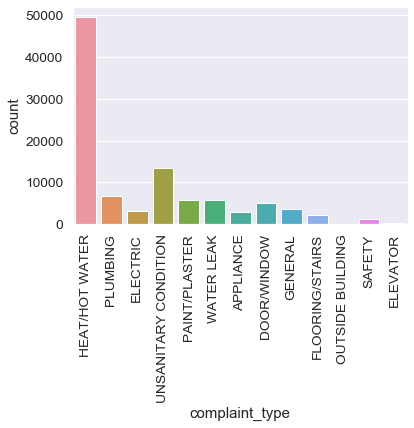

In [13]:
sns.countplot(x='complaint_type',data=df2)
plt.xticks(rotation=90)
plt.show()

### Conclusion

**Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?**

HEAT/HOT WATER

In [14]:
# Save to new csv
#df2.to_csv('nyc1.csv',index=False)